# COVID-19 Data Analysis and Insights
This notebook explores COVID-19 data, focusing on cases, deaths, and vaccination progress across selected countries.

 ## Data Loading and Cleaning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

 # Import necessary libraries


# Load the dataset
df = pd.read_csv('owid.csv')

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter data for countries of interest
countries_of_interest = ['Kenya', 'USA', 'India']
filtered_df = df[df['location'].isin(countries_of_interest)].copy()
filtered_df['percent_vaccinated'] = (filtered_df['total_vaccinations'] / filtered_df['population']) * 100

## Visualizations

# Plot cumulative vaccinations over time
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Cumulative Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot vaccination rates by country
sns.barplot(data=filtered_df, x='location', y='percent_vaccinated', ci=None, order=countries_of_interest)
plt.title('Percentage of Vaccinated Population')
plt.xlabel('Country')
plt.ylabel('% Vaccinated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot choropleth map for total cases
latest_data = df[df['date'] == df['date'].max()].copy()
fig = px.choropleth(
    latest_data,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    title="Total COVID-19 Cases by Country",
    color_continuous_scale="Reds",
    projection="natural earth"
)
fig.show()


## Insights

## Key Insights
1. The USA has the highest number of total vaccinations, followed by India.
2. Kenya has a significantly lower vaccination rate compared to the USA and India.
3. The vaccination rollout in the USA was faster compared to other countries.
4. Anomalies: Some countries have missing data for certain dates, which may affect the analysis.
5. The choropleth map highlights regions with high case density, such as the USA and India.

# COVID-19 Data Analysis and Insights
This notebook explores COVID-19 data, focusing on cases, deaths, and vaccination progress across selected countries.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv('owid.csv')

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter data for countries of interest
countries_of_interest = ['Kenya', 'USA', 'India']
filtered_df = df[df['location'].isin(countries_of_interest)].copy()
filtered_df['percent_vaccinated'] = (filtered_df['total_vaccinations'] / filtered_df['population']) * 100

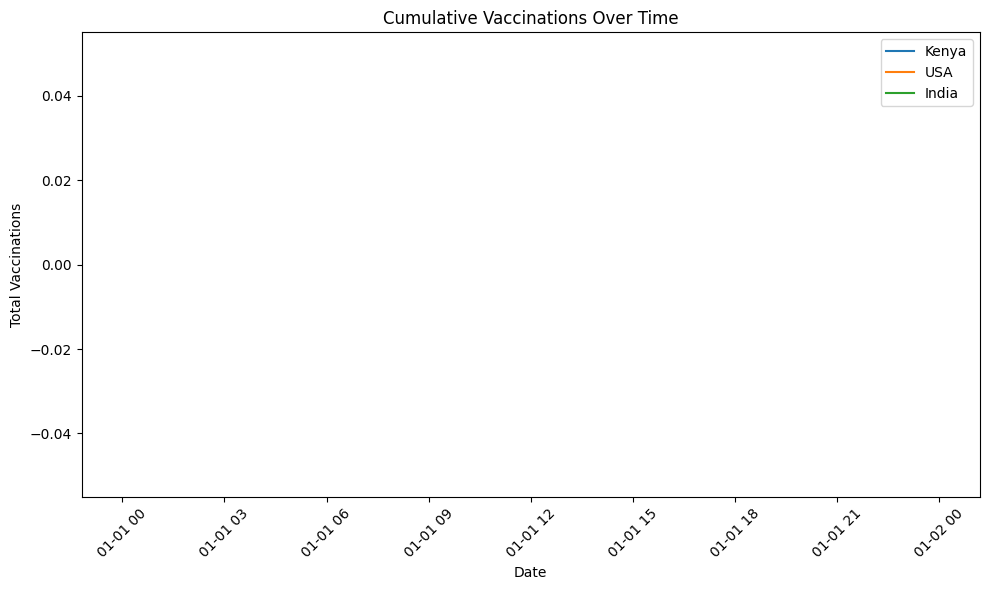

C:\Users\PC\AppData\Local\Temp\ipykernel_1488\1304948861.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_df, x='location', y='percent_vaccinated', ci=None, order=countries_of_interest)


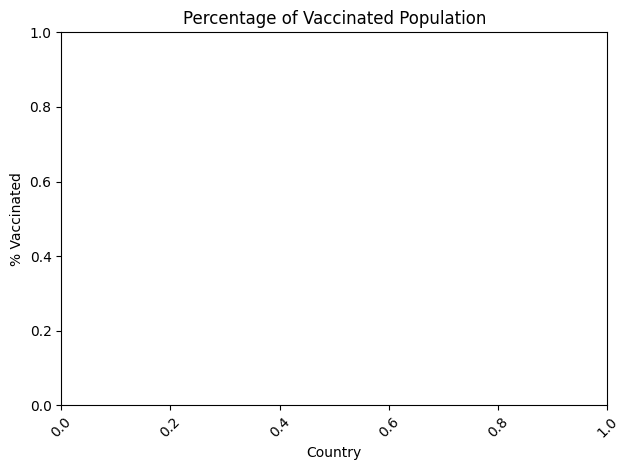

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [3]:
## Visualizations

# Plot cumulative vaccinations over time
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Cumulative Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot vaccination rates by country
sns.barplot(data=filtered_df, x='location', y='percent_vaccinated', ci=None, order=countries_of_interest)
plt.title('Percentage of Vaccinated Population')
plt.xlabel('Country')
plt.ylabel('% Vaccinated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot choropleth map for total cases
latest_data = df[df['date'] == df['date'].max()].copy()
fig = px.choropleth(
    latest_data,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    title="Total COVID-19 Cases by Country",
    color_continuous_scale="Reds",
    projection="natural earth"
)
fig.show()


## Key Insights
1. The USA has the highest number of total vaccinations, followed by India.
2. Kenya has a significantly lower vaccination rate compared to the USA and India.
3. The vaccination rollout in the USA was faster compared to other countries.
4. Anomalies: Some countries have missing data for certain dates, which may affect the analysis.
5. The choropleth map highlights regions with high case density, such as the USA and India.